### 라이브러리 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import font_manager, rc

###  폰트 및  경로설정

In [8]:
plt.style.use('seaborn')
FONT_NAME = font_manager.FontProperties(fname="c:/Windows/Fonts/Gothic.ttf").get_name()  
rc('font', family=FONT_NAME)                                                             

folder_dir = 'C:/data\실습데이터'
DATA_FILE = "krx100_주가_실습.xlsx"      # KOSPI + 100종목

data_wb = pd.ExcelFile(folder_dir + "/" + DATA_FILE)

adj_close = data_wb.parse("Sheet1", header=1, index_col=0)
        

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\2524108127.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 데이터 가공

In [9]:
adj_close.shape

(4602, 101)

In [10]:
adj_close.head(5)

,KOSPI,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,현대차,삼성SDI,NAVER,기아,...,팬오션,호텔신라,셀트리온제약,이마트,OCI홀딩스,알테오젠,GS건설,한화오션,CJ ENM,씨젠
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2006-01-02,1389.27,13180,NaN,37600,NaN,81778,98400,115500,29290,28000,...,NaN,12900,NaN,NaN,21257,NaN,48085,126377,228568,NaN
2006-01-03,1394.87,13300,NaN,38100,NaN,80782,97000,108500,29076,27500,...,NaN,13700,NaN,NaN,21178,NaN,47067,125933,228743,NaN
2006-01-04,1402.11,13980,NaN,35300,NaN,81351,95600,108000,29674,26100,...,NaN,14100,NaN,NaN,21535,NaN,47992,119936,235552,NaN
2006-01-05,1395.51,13580,NaN,34600,NaN,80498,95600,107500,29855,25750,...,NaN,13650,NaN,NaN,21217,NaN,47622,123490,239219,NaN
2006-01-06,1412.78,13740,NaN,35050,NaN,84480,96000,106500,30293,25500,...,NaN,13600,NaN,NaN,21456,NaN,47160,120825,250569,NaN


In [11]:
# adj_close=adj_close[adj_close.index>'2021-08-01']    #  기간설정

df1 =adj_close[['삼성전자', '현대차','LG전자']]  # 특정 컬럼명으로 선택
# df3= adj_close.loc[:,["삼성전자","현대차"]]



In [12]:
df1.head(5)
# df3.tail()

,삼성전자,현대차,LG전자
Symbol Name,,,
2006-01-02,13180,98400,87466
2006-01-03,13300,97000,87955
2006-01-04,13980,95600,86684
2006-01-05,13580,95600,83068
2006-01-06,13740,96000,83264


In [13]:
# 수익률 변환 (누적수익률, 일간수익률 변환)

adj_closey = adj_close.iloc[-1] / adj_close.iloc[0] - 1  # 누적 수익률
adj_desc=adj_closey.sort_values(ascending=False)[:10]     # 수익률 상위 순으로
adj_rate = adj_close[adj_close.index>'2023-01-01'] .pct_change(1)  # 일간수익률 계산
print(adj_desc)
print(adj_rate)

포스코퓨처엠    124.223081
셀트리온       42.609023
엘앤에프       10.638896
고려아연        9.338645
SKC         9.195918
금호석유        5.824742
LG생활건강      5.098004
삼성전자        5.084977
NAVER       4.377262
SK하이닉스      4.311170
dtype: float64
                KOSPI      삼성전자  LG에너지솔루션    SK하이닉스  삼성바이오로직스      LG화학  \
Symbol Name                                                               
2023-01-02        NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-03  -0.003141 -0.001802 -0.012332 -0.001321 -0.029021 -0.004967   
2023-01-04   0.016812  0.043321  0.005675  0.071429 -0.011208  0.000000   
2023-01-05   0.003843  0.006920 -0.021445  0.004938  0.017632 -0.033278   
2023-01-06   0.011181  0.013746  0.024221  0.020885  0.000000  0.022375   
...               ...       ...       ...       ...       ...       ...   
2024-08-09   0.012399  0.017711  0.003115  0.049572 -0.014374  0.034358   
2024-08-12   0.011540  0.010710  0.020186  0.032070 -0.010417  0.013986   
2024-08-13   0.001222  0.

In [14]:
#  기초통계치 

df = adj_close[['삼성전자','LG화학','NAVER','고려아연']].pct_change().fillna(method='bfill')   # bfill (바로 뒤), ffill(바로앞) 값으로 대체

print(df.isnull().all())  # 결측치 존재 확인

df.describe() # stats information 

삼성전자     False
LG화학     False
NAVER    False
고려아연     False
dtype: bool


,삼성전자,LG화학,NAVER,고려아연
count,4602.000000,4602.000000,4602.000000,4602.000000
mean,0.000557,0.000607,0.000665,0.000851
std,0.018048,0.025824,0.024574,0.026299
min,-0.137566,-0.178571,-0.139536,-0.149590
25%,-0.009983,-0.013405,-0.013539,-0.012513
50%,0.000000,0.000000,0.000000,0.000000
75%,0.010282,0.013507,0.013574,0.012605
max,0.130526,0.184783,0.146023,0.150000


###  평균 (장단기 이동평균, 평균회귀)

<Axes: xlabel='Symbol Name'>

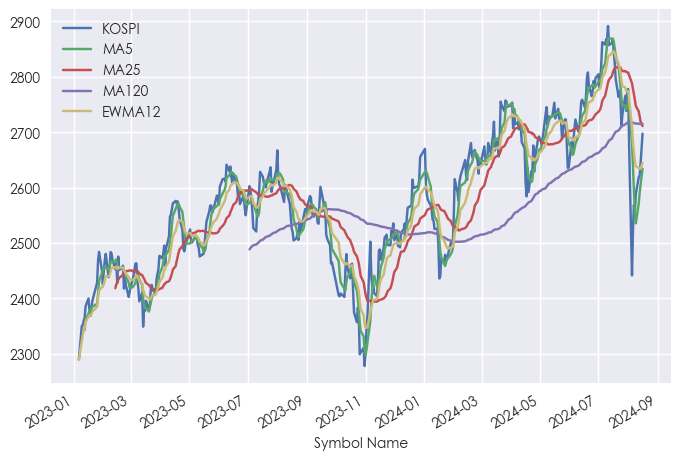

In [15]:

chart=adj_close[adj_close.index>'2023-01-05']

chart=chart[['KOSPI']]

# print(chart)


# Simple Moving Average

ma5= chart['KOSPI'].rolling(5).mean()  
ma25=chart['KOSPI'].rolling(25).mean()  
ma75=chart['KOSPI'].rolling(75).mean()
ma120=chart['KOSPI'].rolling(120).mean()

# Exponentialiy Weighted Moving Average , alpa= 2/(1+span) : smoothing factor

ewma12 = chart['KOSPI'].ewm(span=12).mean()

tot= pd.concat([chart,ma5,ma25,ma120,ewma12],axis=1)
tot.columns = ['KOSPI', 'MA5', 'MA25', 'MA120','EWMA12']
tot.plot()



###  Boxplot

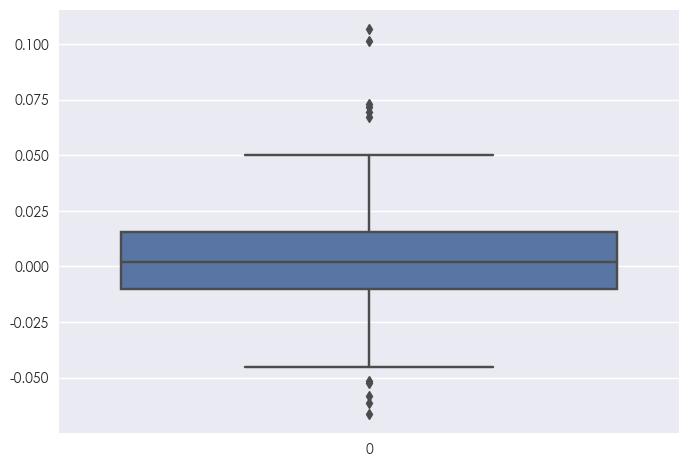

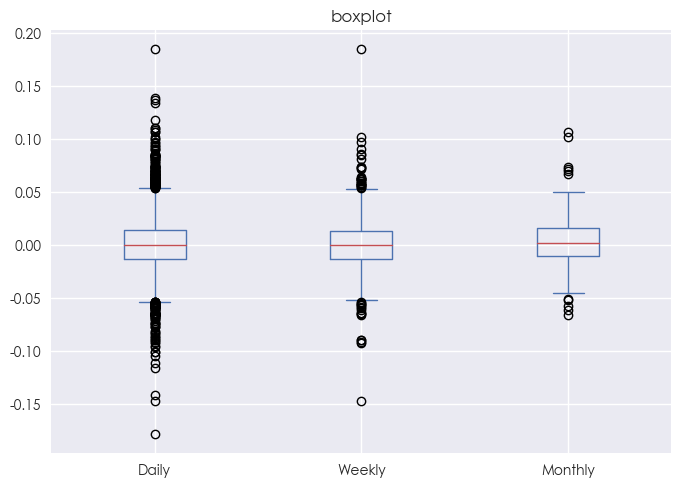

In [16]:
 # boxplot

r = adj_close.pct_change(periods=1)
box= r['LG화학']
dfm= box.resample('M').last()  # mean() 
dfw= box.resample('W').last()  # mean()
# display(dfm,dfw)
df1=pd.concat([box,dfw,dfm],axis=1,join='outer')

# print(df1.head())

df1.columns = ['Daily', 'Weekly', 'Monthly']

plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data=dfm)  #  싱글 그래프

# Plot the dataframe

ax = df1[['Daily', 'Weekly', 'Monthly']].plot(kind='box', title='boxplot')  # 복수 그래프
plt.show()


###  Pair trading

Symbol Name
2006-01-02    3.514286
2006-01-03    3.527273
2006-01-04    3.662835
2006-01-05    3.712621
2006-01-06    3.764706
dtype: float64
count    4602.000000
mean        3.828069
std         1.239749
min         1.891156
25%         2.962562
50%         3.546745
75%         4.551778
max         8.056872
dtype: float64


<Axes: xlabel='Symbol Name'>

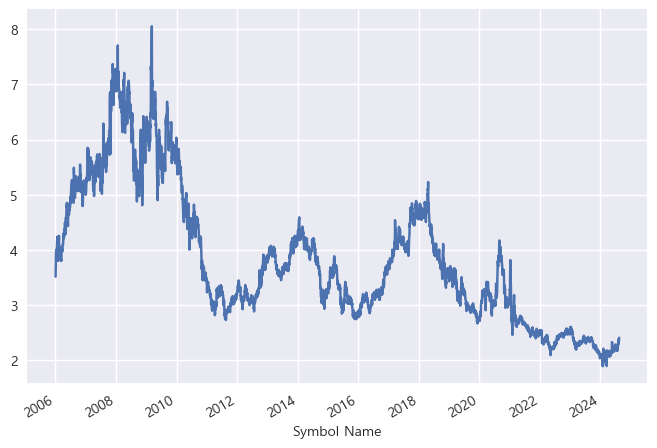

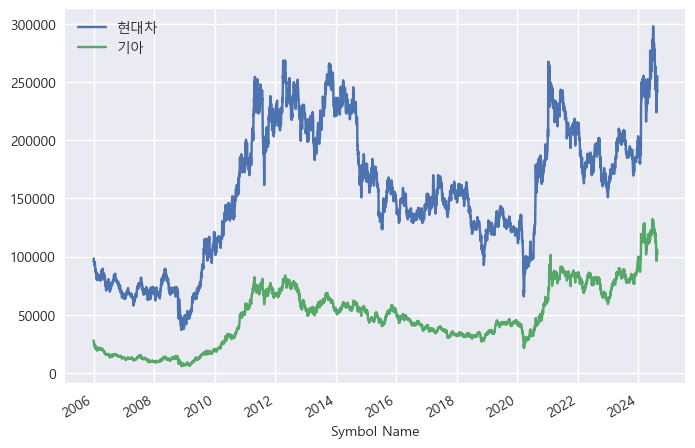

In [17]:
# 페어트레이딩



pair=adj_close['현대차']/adj_close['기아']

print(pair.head(5))
print(pair.describe())

# sn.boxplot(data=pair)


plt.rc('font',family='Malgun Gothic')  #  한글 폰트 깨지지 않도록 폰트지정
plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결

pair.plot()

pair_ori=adj_close[['현대차','기아']]

pair_ori.plot()

# pair1=pair[pair.index>'20110101']

###  분산과 표준편차

In [18]:
vol= chart.pct_change().rolling(90).std()   #  롤링 변동성 추이

In [19]:
vol1=chart.pct_change().rolling(90).std()*(240**0.5)  # 연율화된 변동성 추이

<Axes: xlabel='Symbol Name'>

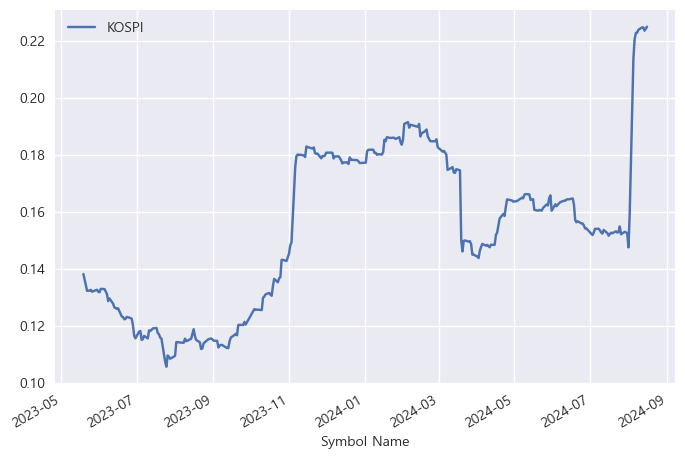

In [20]:
vol1.plot()

###  Normalize (정규화)

In [21]:
#  normalize

from sklearn.preprocessing import MinMaxScaler

def min_max_normal(lst):
    
   normalized=[]
    
   for value in lst: 
      normalized_num=(value-min(lst))/(max(lst)-min(lst))
      normalized.append(normalized_num)
    
   return normalized    
    

min_max_normal(pair)[:10]


[0.2632507503581849,
 0.2653570773251596,
 0.2873435799643395,
 0.2954182486014009,
 0.30386569034490946,
 0.3352695799039959,
 0.311388323000968,
 0.3365411319392917,
 0.34272948791203145,
 0.3313042598184413]

###  Outlier detection

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\3199609767.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 49688 (\N{HANG

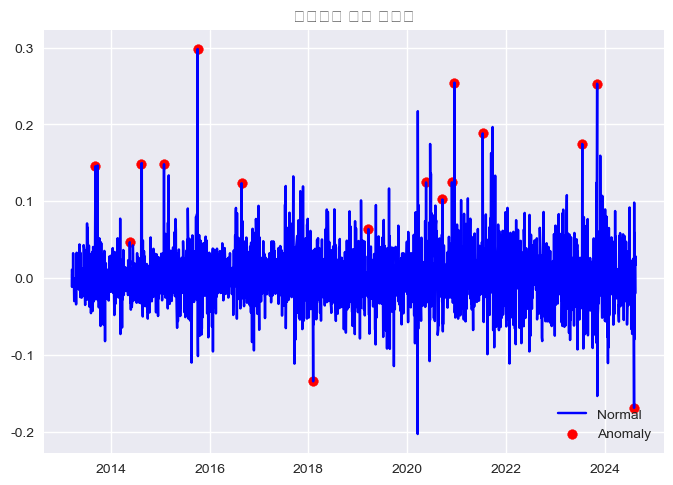

In [95]:
# 특이치 검색 

name='엘앤에프'   # 조회할 종목명 입력

adj_close=adj_close[adj_close.index >'2013-03-15']

r= adj_close.pct_change(periods=1)

df_rolling = r[name].rolling(window=21).agg(['mean', 'std'])
     
s_outliers = r.join(df_rolling)   # 일별 r(수익률) + mean + std  조인

df_outliers=s_outliers[[name,'mean','std']]


def indentify_outliers(row, n_sigmas=3):
    
    x = row[name]
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):  #  or, 합집합 
        return 1
    else:
        return 0 


df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, [name]]

fig, ax = plt.subplots()

plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결

ax.plot(df_outliers.index, df_outliers[name], 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers[name], 
           color='red', label='Anomaly')
ax.set_title(f'{name} 일간 수익률')
ax.legend(loc='lower right')


In [114]:
# 이상치 장기 투자


invest_df = adj_close[['KOSPI','삼성전자','현대차','LG화학','고려아연']]
invest_df['kr']=invest_df['KOSPI'].pct_change(periods=1)   # .pct_change().fillna(method='bfill')   # bfill (바로 뒤), ffill(바로앞) 값으로 대체
invest_df['hr']=invest_df['삼성전자'].pct_change(periods=1)
# invest_df.plot.scatter(x='LG화학',y='KOSPI')
# invest_df.head()
con=invest_df['kr']<= -0.03    # 지수 3% 이상 빠진날 
extra_df=invest_df.loc[con]

extra_df['평균단가']=extra_df['삼성전자'].expanding().mean()  # 누적평균주가 구해 컬럼 만들기
df_join=invest_df.join(other=extra_df['평균단가'])
df_all=df_join.fillna(method='pad')  # 결측치는 이전값으로 채운다


# print(extra_df,len(extra_df))


C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\4268072630.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\4268072630.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\4268072630.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [115]:
# 특이치 통계  ( 주가지수 급락 사례)

cond=invest_df['kr'] <-0.03
kr=invest_df[cond]
print(kr)
len(kr)


               KOSPI   삼성전자     현대차    LG화학    고려아연        kr        hr
Symbol Name                                                            
2016-06-24   1925.24  28000  139500  240000  495000 -0.030941 -0.020979
2018-03-23   2416.76  49720  151500  393500  477000 -0.031755 -0.039784
2018-10-11   2129.67  43100  116000  307000  392500 -0.044395 -0.048565
2019-05-09   2102.01  42450  131000  343000  424500 -0.030443 -0.040678
2020-01-28   2176.72  58800  131000  336500  395000 -0.030902 -0.032895
2020-02-24   2079.04  56800  122500  395000  426000 -0.038745 -0.040541
2020-02-28   1987.01  54200  115000  368000  414500 -0.033033 -0.030411
2020-03-09   1954.77  54200  104000  374000  392000 -0.041883 -0.040708
2020-03-12   1834.33  50800   95000  341500  379500 -0.038747 -0.024952
2020-03-13   1771.44  49950   87200  340500  374000 -0.034285 -0.016732
2020-03-16   1714.86  48900   82900  312500  362500 -0.031940 -0.021021
2020-03-18   1591.20  45600   73500  280000  317000 -0.048576 -0

23

In [116]:
df_all.head(5)

,KOSPI,삼성전자,현대차,LG화학,고려아연,kr,hr,평균단가
Symbol Name,,,,,,,,
2013-03-18,1968.18,28900,219000,268500,360000,NaN,NaN,NaN
2013-03-19,1978.56,29500,218000,267000,350000,0.005274,0.020761,NaN
2013-03-20,1959.41,29200,217500,270000,353500,-0.009679,-0.010169,NaN
2013-03-21,1950.82,29140,215000,275500,345000,-0.004384,-0.002055,NaN
2013-03-22,1948.71,29100,214500,272000,356000,-0.001082,-0.001373,NaN


In [117]:
px.line(df_all,y=["삼성전자","평균단가"],title='삼성전자 ')  # x='비교 컬럼명 '

###  Distribution chart

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\2170104012.py:12: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.

C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\2170104012.py:14: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



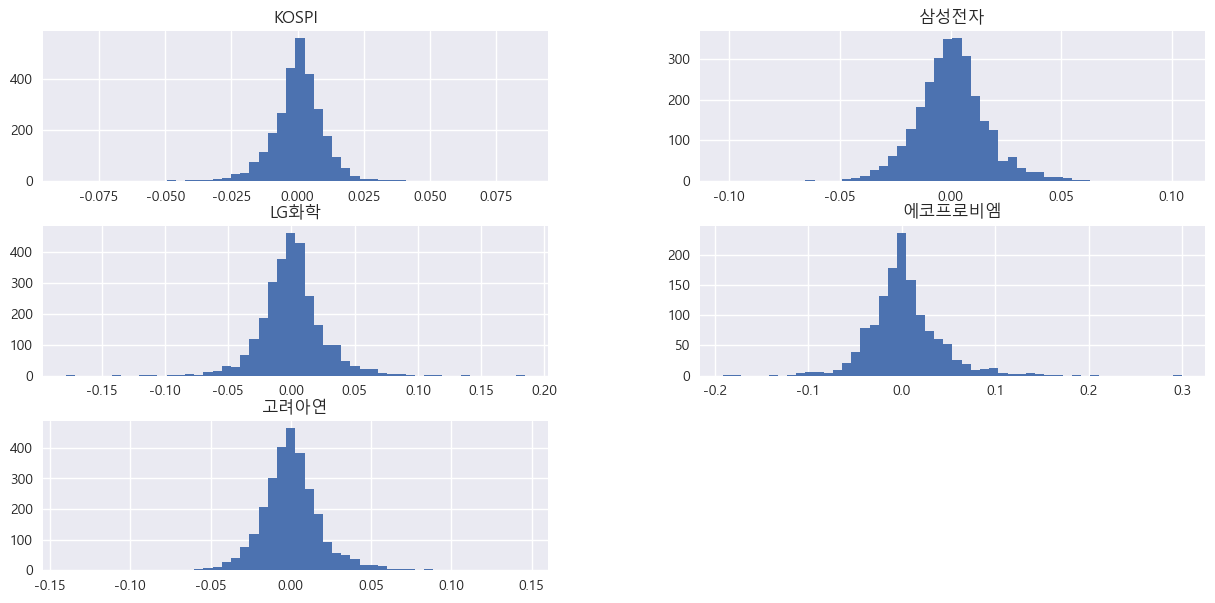

In [126]:
dist_df = adj_close[['KOSPI','삼성전자','LG화학','에코프로비엠','고려아연']]
r = dist_df.pct_change(periods=1)


#  분포도 

%matplotlib inline
plt.rc('font',family='Malgun Gothic')  #  한글 폰트 깨지지 않도록 폰트지정
plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결

fig = plt.figure(figsize=(15, 7))
r.hist(bins=50, ax=ax1,alpha=1)
ax1 = fig.add_subplot(1, 1, 1)
r.hist(bins=50, ax=ax1,alpha=1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Frequency')
ax1.set_title('Return distribution') 

plt.show()




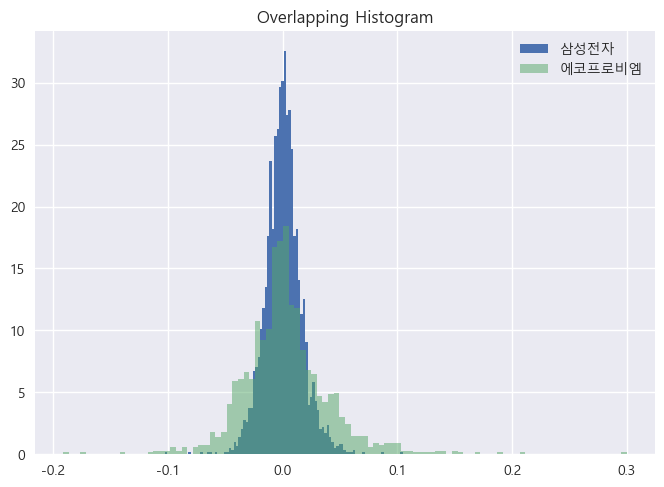

In [28]:
# plotting overlapping histograms  (중첩 그래프)

plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결

plt.hist(r['삼성전자'], label='삼성전자',bins=100,alpha=1.0,density=True)  # alpha:투명도, density: T~ 상대돗수, F~ 데이터 갯수
  
plt.hist(r['에코프로비엠'], label='에코프로비엠',bins=100,alpha=0.5,density=True)

  
plt.legend(loc='upper right')
plt.title('Overlapping Histogram')
plt.show()

In [29]:
# ! pip install scipy

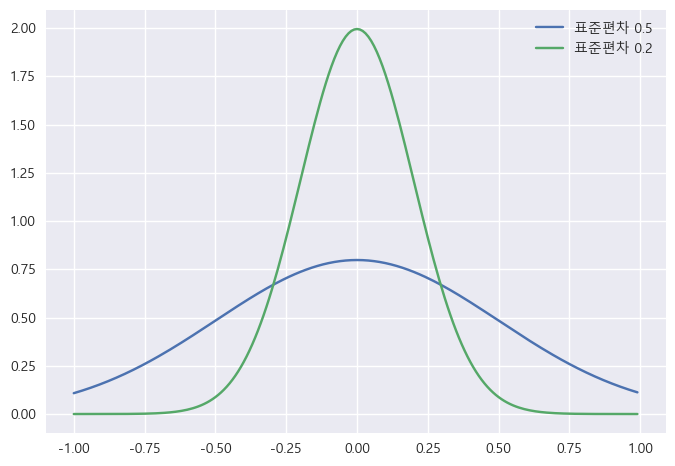

In [30]:
# 통계, 분포도

from scipy.stats import norm

plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결
x_axis=np.arange(-1,1,0.01)
plt.plot(x_axis, norm.pdf(x_axis,0,0.5),label='표준편차 0.5')   # 평균 0, 표준편차 0.5
plt.plot(x_axis, norm.pdf(x_axis,0,0.2),label='표준편차 0.2')   # 평균 0, 표준편차 0.2

plt.legend(loc='upper right')
plt.show()




###  Value at Risk  :  주어진 신뢰수준(알파)에서 최대 예상 손실액 구하기

In [77]:
df_s = adj_close[['현대차']]  

In [78]:
df_s['ret']=np.log(df_s)-np.log(df_s.shift(1))   # 로그수익률


C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\3355644402.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df_s=df_s.loc['2014-01-01':'2024-08-16'].dropna()

In [80]:
df_s.head()

,현대차,ret
Symbol Name,,
2014-01-02,224500,-0.052073
2014-01-03,224000,-0.002230
2014-01-06,228500,0.019890
2014-01-07,229000,0.002186
2014-01-08,229500,0.002181


In [81]:
df_s['ret'].mean()

2.881229427178216e-05

In [82]:
sample = np.random.choice(df_s['ret'], size=125, replace=True)  # replace : 복원추출 /비복원 추출(로또)

In [83]:
len(sample)

125

In [84]:
sum_boots = []        # 매 6개월 합산 로그수익률 (6개월 누적수익률). 로그수익률은 연속복리 수익률

days = 125  #투자일수
n = 1000    # 반복실행횟수

for i in range(n):
    sample = np.random.choice(df_s['ret'], size=days, replace=True)
    sample_sum = sample.sum()   # 누적수익률 ( = 로그수익률의 합 )
    sum_boots.append(sample_sum)  

    

In [85]:
len(sum_boots)

1000

In [86]:
sum_boots[:5]

[0.5535308783091484,
 -0.1360897641074459,
 0.194696425238984,
 0.08127091202906023,
 -0.1694106432561746]

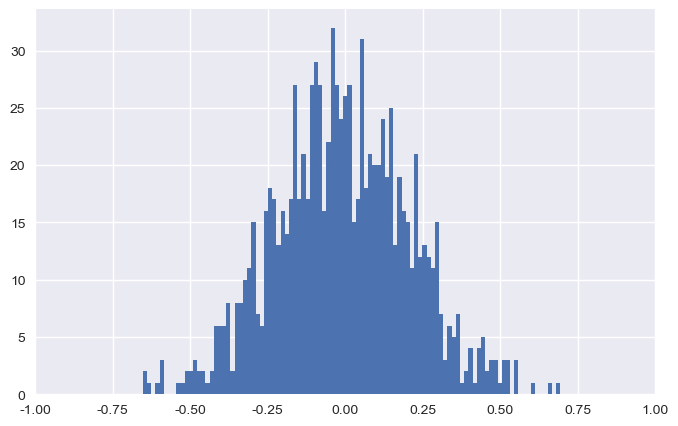

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sum_boots, alpha=1.0, bins=100) 
ax.grid(True)
ax.set_xlim((-1, 1))
plt.savefig("bootstrapping01.png", dpi=150, bbox_inches='tight')
plt.show()

In [88]:
ret = np.array(sum_boots)

In [89]:
ret95 = np.percentile(ret, 95)  # 상위 5%   (유의수준)

In [90]:
ret5 = np.percentile(ret, 5)   # 하위 5%

In [91]:
# 로그 수익률 --> 일반 수익률로 변환

Ret5 = np.exp(ret5) - 1

In [92]:
Ret5

-0.3066902946546527

In [93]:
VaR95= Ret5*100000000

In [94]:
VaR95

-30669029.46546527

###  Volatility 

KOSPI    0.155793
KT       0.198232
KT&G     0.219610
SK텔레콤    0.233016
삼성전자     0.249600
dtype: float64 셀트리온제약    0.574498
HMM       0.588092
에코프로비엠    0.594355
알테오젠      0.675223
HLB       0.725051
dtype: float64


KOSPI    0.134559
KT&G     0.153773
KT       0.157712
SK텔레콤    0.177730
삼성전자     0.197546
dtype: float64

HMM       0.524607
카카오페이     0.538221
셀트리온제약    0.587627
알테오젠      0.613944
HLB       0.671956
dtype: float64

<Axes: >

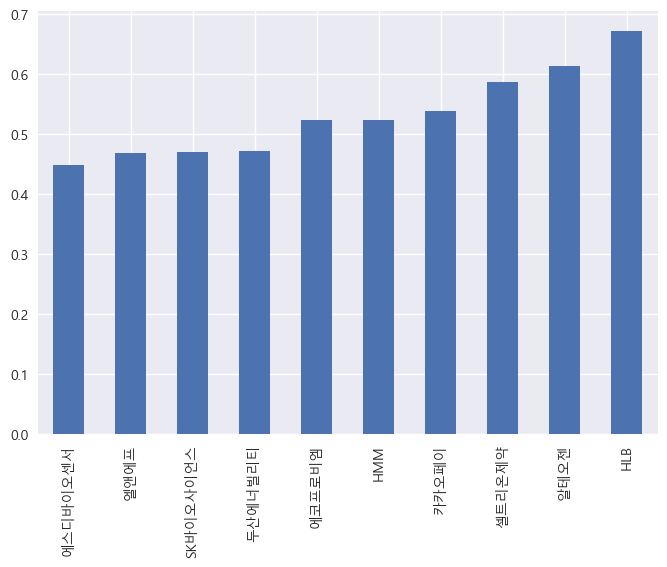

In [128]:
# 변동성 랭킹 구하기

df=adj_close
daily_ret = df.pct_change()     # 일간 변화률
vol_y=daily_ret.std()*np.sqrt(240)   # 일간 변동성 연율화

voly = vol_y.sort_values(ascending=True)

print(voly.head(5),voly.tail(5))

# vol10 = voly.sort_values(ascending=True)[:10]    # 상위 10위  막대그래프로 그리기
# volu.plot.bar()


# 주간 변동성

dfw= df.resample('w').mean()   # first/last/mean

weekly_ret = dfw.pct_change()     # 주간 변화율

vol_w=weekly_ret.std()*np.sqrt(52)  # 주간 변동성(연율화)

volw = vol_w.sort_values(ascending=True)

display(volw.head(5),volw.tail(5) )

# vol10 = vol_w.sort_values(ascending=True)[-10:]    # 하위 10위  막대그래프로 그리기
volw.tail(10).plot.bar()

###  성과평가 (평균수익률)

In [50]:
# 산술평균

arithmetric_mean =df.mean() 
print ('The Arithmetric Mean is: ' + str(arithmetric_mean) )



The Arithmetric Mean is: KOSPI         2303.725391
삼성전자         49002.480427
LG에너지솔루션    460073.248408
SK하이닉스       78318.202847
삼성바이오로직스    594857.035060
                ...      
알테오젠         39967.435951
GS건설         30628.901068
한화오션         41902.036655
CJ ENM      186207.010676
씨젠           30042.666548
Length: 101, dtype: float64


2810
The Geometric Mean is: 0.00037061335339694246
The Geometric Mean is: 0.00037061335339694246
cumulative_returns: 1.8327007578932437
cumulative_returns: 1.8327007578932437


<Axes: xlabel='Symbol Name'>

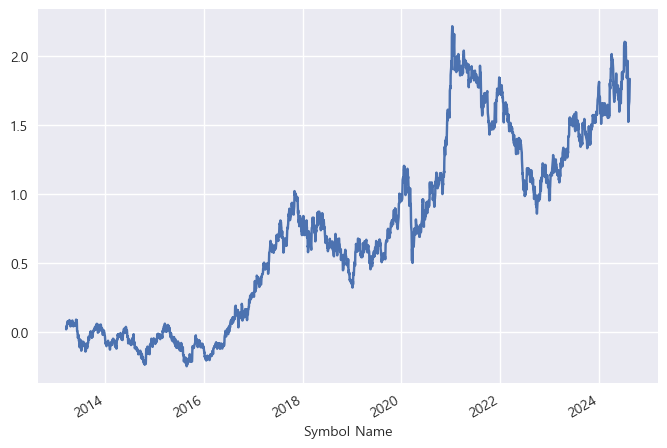

In [51]:
# 기하평균

# adj_close=adj_close[adj_close.index>'2021-08-01'] 

dfs=adj_close['삼성전자'].pct_change().fillna(method='bfill') 

multiply = 1
values = dfs
n = len(values)
print(n)
for i in values:
    multiply = (multiply)*(i+1)

geometric_mean = (multiply)**(1/n)-1

print ('The Geometric Mean is: ' + str(geometric_mean)) 

Geometric_mm = np.exp(np.log(values+1).sum())**(1/n)-1  

print ('The Geometric Mean is: ' + str(Geometric_mm)) 


c_mean = (multiply)-1

cumsum=(values+1).product()-1    # 누적수익률

print ('cumulative_returns: ' + str(cumsum)) 
print ('cumulative_returns: ' + str(c_mean)) 

((values + 1).cumprod() - 1).plot()  #  누적수익률 그래프 

# cumulative_returns_df = np.exp(np.log(values+1).sum())-1    # 자연로그 np.log(x), 상용로그 np.log10(x)
# print ('cumulative_returns: ' + str(cumulative_returns_df)) 


<Axes: xlabel='Symbol Name'>

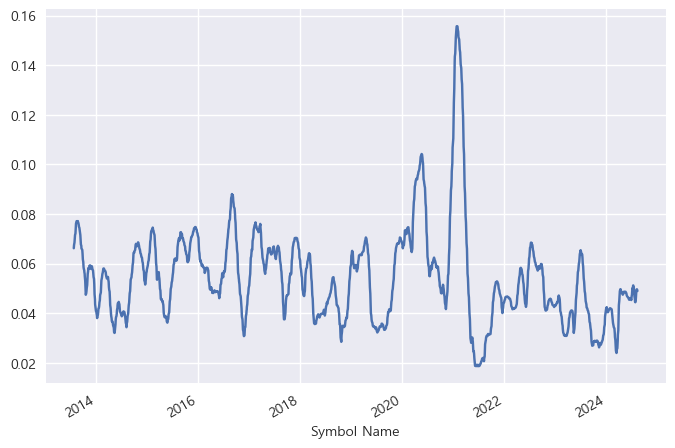

In [52]:
# CV : 변동계수

v= adj_close['삼성전자'].rolling(90).std()
m=adj_close['삼성전자'].rolling(90).mean()  # 변동계수
    
cv=v/m
cv.plot()   



### 공분산, 상관계수

In [53]:
#  공분산 행렬 

jong =adj_close[['삼성전자','현대차','카카오','LG화학','NAVER','삼성SDI','삼성화재','대한항공','LG','SK텔레콤']]
jr=jong.pct_change().dropna() 
cova =jr.cov().round(5)
cova.style.background_gradient(cmap='coolwarm').set_precision(5)



C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\313903694.py:6: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,삼성전자,현대차,카카오,LG화학,NAVER,삼성SDI,삼성화재,대한항공,LG,SK텔레콤
삼성전자,0.00026,0.00009,0.00009,0.00011,0.00010,0.00013,0.00005,0.00009,0.00009,0.00003
현대차,0.00009,0.00040,0.00006,0.00013,0.00007,0.00011,0.00008,0.00010,0.00012,0.00004
카카오,0.00009,0.00006,0.00056,0.00013,0.00023,0.00016,0.00003,0.00010,0.00009,0.00003
LG화학,0.00011,0.00013,0.00013,0.00059,0.00011,0.00033,0.00007,0.00013,0.00018,0.00003
NAVER,0.00010,0.00007,0.00023,0.00011,0.00048,0.00012,0.00004,0.00009,0.00008,0.00004
삼성SDI,0.00013,0.00011,0.00016,0.00033,0.00012,0.00060,0.00006,0.00011,0.00014,0.00004
삼성화재,0.00005,0.00008,0.00003,0.00007,0.00004,0.00006,0.00033,0.00007,0.00010,0.00005
대한항공,0.00009,0.00010,0.00010,0.00013,0.00009,0.00011,0.00007,0.00049,0.00012,0.00005
LG,0.00009,0.00012,0.00009,0.00018,0.00008,0.00014,0.00010,0.00012,0.00035,0.00006
SK텔레콤,0.00003,0.00004,0.00003,0.00003,0.00004,0.00004,0.00005,0.00005,0.00006,0.00023


In [54]:
# 상관계수

cor =jr.corr().round(5)
cor.style.background_gradient(cmap='coolwarm').set_precision(5)


C:\Users\wonee\AppData\Local\Temp\ipykernel_24544\4184212117.py:4: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,삼성전자,현대차,카카오,LG화학,NAVER,삼성SDI,삼성화재,대한항공,LG,SK텔레콤
삼성전자,1.00000,0.29318,0.22747,0.28738,0.27565,0.32956,0.15537,0.25406,0.29238,0.13920
현대차,0.29318,1.00000,0.13523,0.26459,0.16857,0.22357,0.22647,0.22835,0.32987,0.12915
카카오,0.22747,0.13523,1.00000,0.22899,0.45552,0.26994,0.06982,0.19706,0.19587,0.09406
LG화학,0.28738,0.26459,0.22899,1.00000,0.20682,0.55260,0.15741,0.24708,0.39284,0.09268
NAVER,0.27565,0.16857,0.45552,0.20682,1.00000,0.22289,0.10936,0.19481,0.20136,0.12943
삼성SDI,0.32956,0.22357,0.26994,0.55260,0.22289,1.00000,0.12645,0.20773,0.29475,0.10380
삼성화재,0.15537,0.22647,0.06982,0.15741,0.10936,0.12645,1.00000,0.17704,0.28367,0.17818
대한항공,0.25406,0.22835,0.19706,0.24708,0.19481,0.20773,0.17704,1.00000,0.28781,0.14498
LG,0.29238,0.32987,0.19587,0.39284,0.20136,0.29475,0.28367,0.28781,1.00000,0.20441
SK텔레콤,0.13920,0.12915,0.09406,0.09268,0.12943,0.10380,0.17818,0.14498,0.20441,1.00000


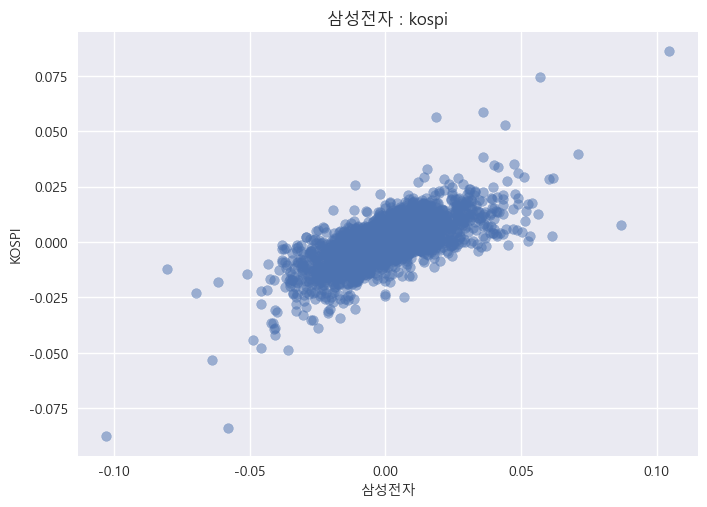

In [55]:
# 산포도 (scatter diagram)


X = adj_close['삼성전자'].pct_change()
Y = adj_close['KOSPI' ].pct_change()

plt.rcParams['axes.unicode_minus'] = False  # 그래프 축 음수깨지는 것 해결
plt.scatter(X, Y, alpha=0.5)
plt.title('삼성전자 : kospi')
plt.xlabel('삼성전자')
plt.ylabel('KOSPI')
plt.show()

###  회귀분석

In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 단순회귀분석


s_data=pd.DataFrame({'sales':[2500,2100,1500,1200,650,540,480,220,150,125],'ad_cost':[220,210,170,180,70,45,52,10,8,9]})

x=s_data[['ad_cost']]  # 독립변수
y=s_data[['sales']]    # 종속변수


In [57]:
# 단순회귀분석 실행


x = sm.add_constant(x)
model = sm.OLS(y, x)

results = model.fit()
print(results.summary())  # 디폴트 alpha=0.05 (유의수준)


print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     98.88
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           8.85e-06
Time:                        15:16:45   Log-Likelihood:                -68.092
No. Observations:                  10   AIC:                             140.2
Df Residuals:                       8   BIC:                             140.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3956    119.559      0.346      0.7

C:\Users\wonee\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



alpha:0.0003078223298973631
beta:1.136676277773728


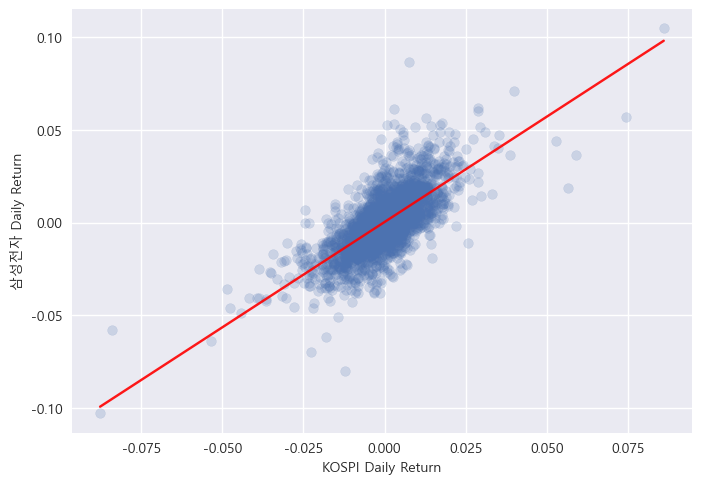

In [58]:
# 회귀분석 2  : 베타계수 구하기

from statsmodels import regression

r_a = adj_close[['삼성전자']].pct_change()[1:]
r_b = adj_close[['KOSPI']].pct_change()[1:]


X = r_b.values
Y = r_a.values


def linreg(x,y):
 x = sm.add_constant(x)
 model = regression.linear_model.OLS(y,x).fit()
 x = x[:,1]
 return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print ('alpha:' + str(alpha))
print ('beta:' + str(beta))


X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha= 0.2)
plt.xlabel("KOSPI Daily Return")
plt.ylabel("삼성전자 Daily Return")
plt.plot(X2, Y_hat, 'r', alpha= 0.9);
plt.show()



In [59]:
# 다중회귀분석 

kdata=pd.read_excel('C:/data/실습데이터/burger_month.xlsx',sheet_name='Sheet1',index_col=0)
kdata.head()


,sales,price,ad_cost
city,,,
1,73.2,5.69,1.3
2,71.8,6.49,2.9
3,62.4,5.63,0.8
4,67.4,6.22,0.7
5,89.3,5.02,1.5


In [60]:
x=kdata[['price','ad_cost']]  
y=kdata[['sales']]

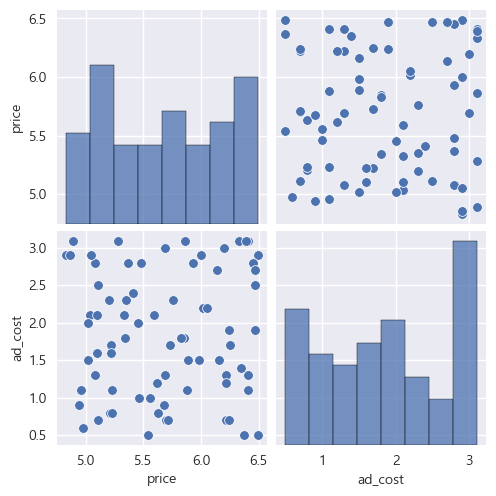

In [62]:
# 변수의 기본분석 (시각화)

sns.pairplot(x[['price','ad_cost']])  

In [63]:
# 다중 회귀분석 실행


x = sm.add_constant(x)
model = sm.OLS(y, x)

results = model.fit()
print(results.summary(alpha=0.01))


print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     29.25
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           5.04e-10
Time:                        15:17:38   Log-Likelihood:                -223.87
No. Observations:                  75   AIC:                             453.7
Df Residuals:                      72   BIC:                             460.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
const        118.9136      6.352     18.722      0.0

In [64]:
# 다중공선성 체크


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)


,VIF Factor,features
0,126.7,const
1,1.0,price
2,1.0,ad_cost


###  Cashflows , IRR (내부수익률 )

In [76]:
# NPV 계산, 현금흐름 일정 가정, rate는 할인율, cashflows는 현금 흐름, t는 기간

def npv_cal(rate, cashflows,t):
    npv=0.0
    for i in range(1, t):
        npv +=cashflows/(1+rate)**i   # 누적합
        print(i)
    return npv
    
value= npv_cal(0.05,1000,5)  

print(value)

1
2
3
4
3545.95050416236


In [58]:
# npv 구하기, 현금흐름(cashflows) 리스트로 입력하는 경우


def npv_calc(rate, cashflows):
    npv=0.0
    for i in range(0, len(cashflows)):
        npv +=cashflows[i]/(1+rate)**i  
    return npv

# other cashflows=[-100,-30,10,40,50,45,20]
cashflows =[-1000,100,100,100,100,100,100,100,100,100,1100]

rate=0.03874   

calc=npv_calc(rate,cashflows)
print(calc)

500.00479604983155


In [59]:
# 내부수익률 구하기

def npv_calc(rate, cashflows):
    npv=0.0
    for i in range(0, len(cashflows)):
        npv +=cashflows[i]/(1+rate)**i
     
    return npv


cashflows =[-1500,100,100,100,100,100,100,100,100,100,1100]


def irr_c(cashflows):
     r=0.0
     npv_temp=0
     while(npv_calc(r,cashflows)>0):
        npv_temp=npv_calc(r,cashflows)
        if(npv_temp<=0.01):
           print(r)
        else:
            print("rate:", r, "npv:",npv_temp)
            r+=0.001
print("irr:",irr_c(cashflows))

rate: 0.0 npv: 500.0
rate: 0.001 npv: 484.5767094127051
rate: 0.002 npv: 469.30568256351194
rate: 0.003 npv: 454.18520302754666
rate: 0.004 npv: 439.2135757536014
rate: 0.005 npv: 424.3891267746948
rate: 0.006 npv: 409.7102029228131
rate: 0.007 npv: 395.17517154785014
rate: 0.008 npv: 380.78242024059546
rate: 0.009000000000000001 npv: 366.530356559799
rate: 0.010000000000000002 npv: 352.4174077631501
rate: 0.011000000000000003 npv: 338.4420205422159
rate: 0.012000000000000004 npv: 324.60266076116386
rate: 0.013000000000000005 npv: 310.89781319933024
rate: 0.014000000000000005 npv: 297.32598129745315
rate: 0.015000000000000006 npv: 283.88568690762827
rate: 0.016000000000000007 npv: 270.57547004682624
rate: 0.017000000000000008 npv: 257.3938886540118
rate: 0.01800000000000001 npv: 244.33951835071628
rate: 0.01900000000000001 npv: 231.41095220510272
rate: 0.02000000000000001 npv: 218.606800499379
rate: 0.02100000000000001 npv: 205.92569050059524
rate: 0.022000000000000013 npv: 193.3662662

In [60]:
# ! pip install numpy_financial

In [73]:
# 금액가중수익률, IRR  (패키지 메서드 활용)

import numpy as np
import numpy_financial as npf

cashflows =[-1500,100,100,100,100,100,100,100,100,100,1100]

irr=npf.irr(cashflows)

npv=npf.npv(irr,cashflows)

print('IRR {0:.1%} makes NPV {1:.2f}'.format(irr,npv))



IRR 3.9% makes NPV 0.00
